# Ceneo Analyzer

## Biblioteki

In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Lista kodów wszystkich produktów, o których zostały pobrane opinie

In [36]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep = "\n")

156456
156802519
51614
99891161


## Kod produktu, dla krórego ma zostać wykonana analiza opinii

In [37]:
product_id = input("Podaj kod produktu w serwisie Ceneo.pl: ")

## Wczytanke do obiektu pandas.DataFrame opinii o wskazanym produkcie

In [38]:
opinions = pd.read_json(f"opinions/{product_id}.json")

In [39]:
opinions

,opinion_id,author,recommendation,rating,content,pros,cons,useful,useless,publish_date,purchase_date
0,18387464,MIODAR,Polecam,5/5,Jest to mój pierwszy tego typu blender. Postan...,[],[],0,0,2024-02-11 04:05:41,2024-02-03 10:38:15
1,18537596,kasiulek,Polecam,5/5,"Rewelacyjny, piękny dizajn, posiadam kolor mie...",[],[],0,0,2024-03-30 08:31:50,2024-03-28 07:32:50
2,18359374,Natalia,Polecam,5/5,"Dopiero zaczynam przygodę z Blendy, ale:\nJest...",[],[],0,0,2024-02-01 19:23:06,2024-01-28 14:47:11
3,18394372,angelikasitek26,Polecam,5/5,Produkt bardzo solidnie wykonany. Piękny żywy ...,[],[],0,0,2024-02-13 13:50:51,2024-02-11 23:30:15
4,18590279,m...0,Polecam,5/5,"Bardzo fajnie urządzenie, w podróży nie trzeba...",[],[],0,0,2024-04-20 06:28:13,2024-04-10 07:08:52
...,...,...,...,...,...,...,...,...,...,...,...
128,18002927,Użytkownik Ceneo,Polecam,5/5,Czekałem na premierę wersji 3 i się nie zawiod...,[],[],0,0,2023-10-15 19:52:06,None
129,18057101,Użytkownik Ceneo,Polecam,5/5,To mój pierwszy blender od Blendy go i jest to...,[],[],0,0,2023-11-01 20:12:48,None
130,18022873,Dmitrij,Polecam,5/5,blender jest świetny. Szukałem przenośnego. Do...,[],[],0,0,2023-10-20 17:53:20,None
131,17903116,Użytkownik Ceneo,Polecam,5/5,Jest super😀,[],[],0,0,2023-09-14 21:25:19,None


In [40]:
opinions.rating = opinions.rating.apply(lambda rate: rate.split("/")[0].replace(",",".")).astype(float)

## Podstawowe statystyki

In [41]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_rating = opinions.rating.mean()

## Histogram częstości poszczególnych ocen w opiniach o produkcie

rating
0.0      0.0
0.5      2.0
1.0      0.0
1.5      0.0
2.0      0.0
2.5      1.0
3.0      1.0
3.5      1.0
4.0      1.0
4.5      9.0
5.0    118.0
Name: count, dtype: float64


[Text(0, 0, ''),
 Text(0, 0, '2'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '9'),
 Text(0, 0, '118')]

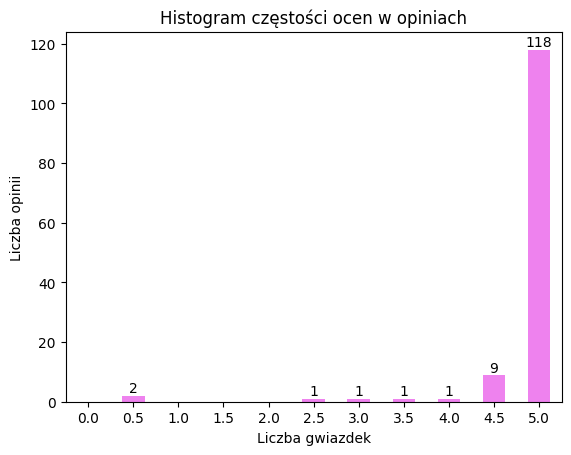

In [42]:
rating_distribution = opinions.rating.value_counts().sort_index().reindex(np.arange(0,5.5,0.5), fill_value = 0.0)
print(rating_distribution)
fig, ax = plt.subplots()
rating_distribution.plot.bar(color = 'violet')
plt.xticks(rotation= 0)
plt.xlabel("Liczba gwiazdek")
plt.ylabel('Liczba opinii')
plt.title("Histogram częstości ocen w opiniach")
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: int(x) if x > 0 else "")

## Udział poszczególnych rekomendacji w opiniach o produkcie

Text(0.5, 1.0, 'Udział rekomendacji w opiniach')

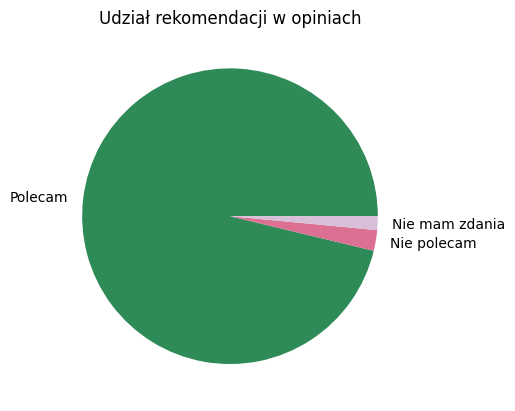

In [48]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex(["Polecam", "Nie polecam", None])
recommendation_distribution
recommendation_distribution.plot.pie(
    label="",
    colors=["seagreen", "palevioletred", "thistle"],
    labels = ["Polecam", "Nie polecam", "Nie mam zdania"]
)
plt.title("Udział rekomendacji w opiniach")